# 2-D CCN application to a set of different CCSN waveform

Core-collapse supernovae (CCSNe) are extreme astrophysical events that can potentially generate gravitational waves, which are ripples in the fabric of spacetime. Theoretical models have provided insights into the potential waveforms that could be associated with these events. Here are some aspects to consider:

* Prompt Gravitational Waves: Prompt gravitational waves refer to the initial burst of gravitational radiation emitted during the core collapse and bounce phase of a supernova. This phase occurs when the stellar core undergoes a rapid collapse and subsequently rebounds due to the stiffening of nuclear matter. Theoretical calculations suggest that this rapid change in the core's dynamics could generate a short-duration burst of gravitational waves, lasting only a few milliseconds.

* Convective Instability and Asymmetry: During the post-bounce phase of a CCSN, the turbulent convective motions in the outer layers of the collapsing star can induce asymmetries in the explosion. These asymmetries, such as the growth of large-scale vortices and turbulent eddies, can potentially generate gravitational waves. The resulting gravitational waveforms would exhibit characteristic oscillations and modulations corresponding to the convective motions and asymmetries within the supernova.

* Neutrino-Driven Convection: Neutrinos, which are subatomic particles produced abundantly in CCSNe, play a crucial role in the dynamics of these events. Neutrino-driven convection occurs when the intense neutrino flux emitted during the core-collapse phase interacts with matter, driving convective motions in the outer layers of the supernova. These convective motions can generate gravitational waves due to the associated mass motions and asymmetries.

* Supernova Remnant: After the initial explosion, a supernova remnant is formed, consisting of the ejected material expanding into the surrounding medium. As the remnant evolves, interactions between the expanding shock wave and the circumstellar or interstellar medium can generate gravitational waves. These waves would arise from the dynamical processes and instabilities occurring within the remnant, providing information about its structure and evolution.

It is important to note that the study of gravitational wave emission from CCSNe is still an active area of research. As gravitational wave detectors become more sensitive and advancements in theoretical modeling continue, we may gain a deeper understanding of the potential waveforms associated with these extraordinary astrophysical events.

## Different CCSN signals to classify

In this tutorial, we will tackle the task of classifying different signals. In particular, we will have access to three distinct types of gravitational wave (GW) waveforms generated by core-collapse supernovae (CCSN), as well as chirp waveforms with different signal-to-noise ratio (SNR) distributions.

GW waveforms from CCSN represent the signals generated during the energetic explosions that occur at the end of a massive star's life. These gravitational waveforms can be detected by gravitational wave observatories such as LIGO and Virgo. In our case, we will have three types of CCSN waveforms, each with unique distinguishing features.

Additionally, we will also have chirp waveforms, which are signals characterized by a gradual frequency transition over time. These chirp waveforms will have different SNR distributions, representing the ratio between the signal power and the background noise power present in the data.

The goal of this tutorial will be to develop a classification model that can distinguish between the different types of signals at our disposal. We will utilize machine learning techniques, such as neural network training, to create a classifier that can learn the distinctive patterns of each signal type and make accurate predictions about their classification.

During the training process, we will use an annotated dataset that contains examples of the various CCSN GW waveforms and chirp waveforms with their respective SNR distributions. This will allow us to teach our model to recognize the salient features of each signal type and correctly associate them with their respective classes.

Once the model is trained, we will evaluate it using a separate test dataset to assess its performance in classifying unknown signals. We will monitor metrics such as prediction accuracy and confusion matrices to evaluate the effectiveness of our model in correctly distinguishing between the different signal types.

In conclusion, through this tutorial, we will have the opportunity to explore signal classification using CCSN GW waveforms and chirp waveforms with different SNR distributions. By employing machine learning techniques, we will strive to develop a classification model that can accurately differentiate between the various signal types, paving the way for further discoveries and applications in the field of astronomy and gravitational wave physics.

## ET noise sensitivity

The sensitivity of the Einstein Telescope is expected to be several orders of magnitude higher than existing detectors like LIGO and Virgo. This enhanced sensitivity opens up new possibilities for detecting a wider range of gravitational wave sources and extracting more detailed information from the observed signals. We simulated the detector noise as in the case of the Einstein Telescope.

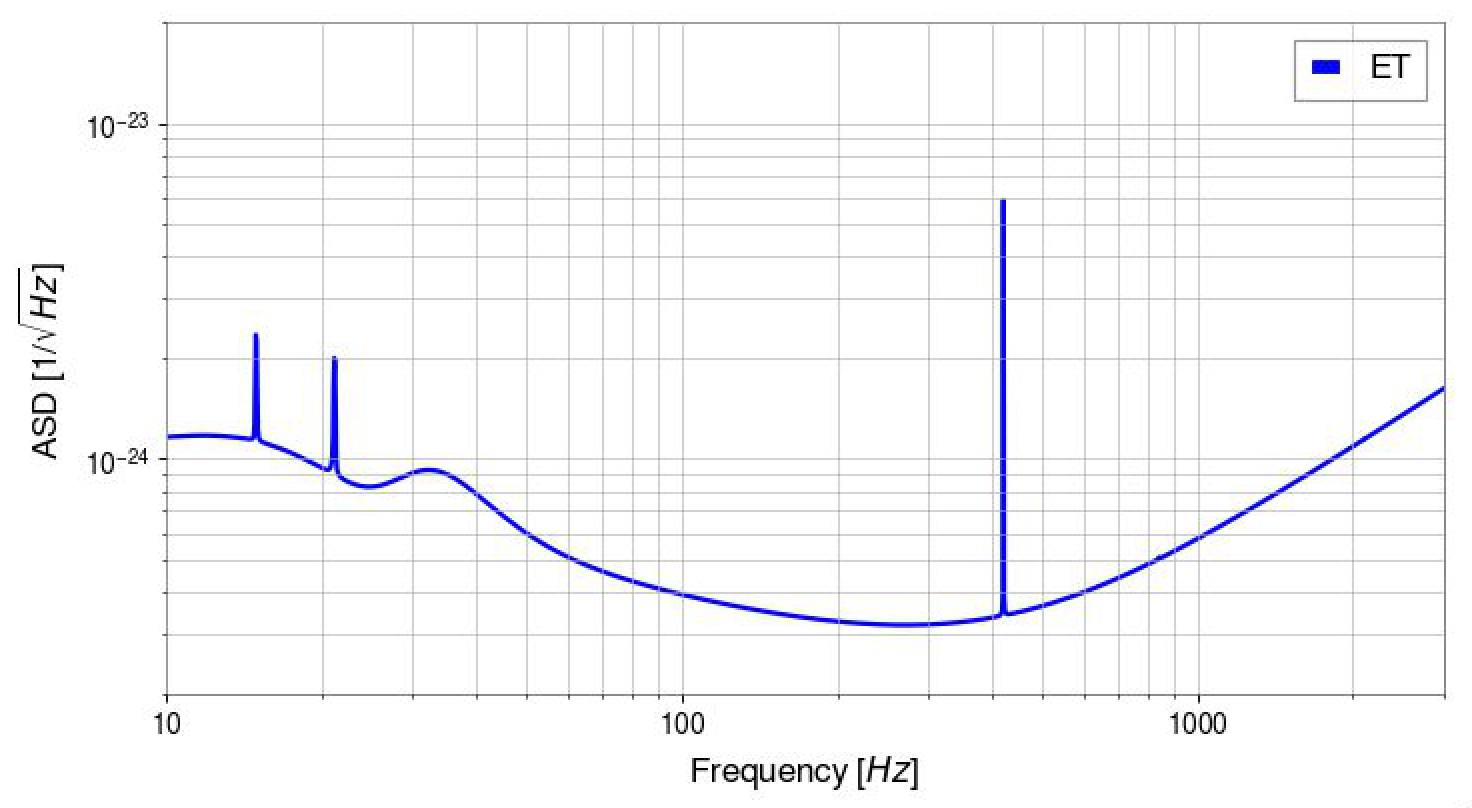

In [1]:
from IPython import display
display.Image("ET_sensitivity.png")

# The data

In this tutorial, we will be working with simulated data that replicates the sensitivity of the Einstein Telescope (ET). These data have been carefully generated to include four different types of waveforms, each with varying Signal-to-Noise Ratio (SNR) values.

To ensure the data is ready for analysis, we have pre-processed it by applying a whitening technique. This process helps to normalize the data and remove any frequency-dependent noise, allowing you to work directly with the waveforms.

The simulated data has a sampling rate of 4096 Hz, meaning that measurements were taken 4096 times per second. This high sampling rate enables precise capturing of the waveforms' characteristics and ensures accurate analysis.

Furthermore, the data is divided into windows of 2 seconds each. This window size provides a suitable duration for analyzing the waveforms and extracting meaningful features.

### Let's download our data set which we will use for our goal

In [2]:
import os
try:
    import wget
    import requests
except:
    ! pip install -q "wget"
    ! pip install -q "request"
import tqdm

def download(url: str, filename: str):
    with open(filename, 'wb') as f:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            total = int(r.headers.get('content-length', 0))

            # tqdm has many interesting parameters. Feel free to experiment!
            tqdm_params = {
                'desc': url,
                'total': total,
                'miniters': 1,
                'unit': 'B',
                'unit_scale': True,
                'unit_divisor': 1024,
            }
            with tqdm.tqdm(**tqdm_params) as pb:
                for chunk in r.iter_content(chunk_size=8192):
                    pb.update(len(chunk))
                    f.write(chunk) 

In [3]:
url_orig = "https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download"
target_path = '../../data/'

if not os.path.exists(target_path):
    os.mkdir(target_path)

target_file= '../../data/datasets.tgz'
download(url_orig, target_file)

https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download: 100%|█| 412M/412M [00:05<00:00, 83.1MB/


In [4]:
import tarfile
tardata = tarfile.open(target_file)
tardata.extractall(target_path) # specify which folder to extract to
tardata.close()

You have access to 4 different types of signals: 3 from core-collapse supernovae (CCSN) and 1 from chirp waveforms. Specifically, for CCSN, we have: Non Exploding, Neutrino Explosion Mechanism, and Magnetorotational Explosion Mechanism.

- Non Exploding: This type of CCSN signal represents cases where the core-collapse supernova event does not result in a successful explosion. The collapse of the stellar core occurs without a significant release of energy, leading to a lack of observable explosion-related gravitational waveforms.

- Neutrino Explosion Mechanism: The Neutrino Explosion Mechanism signals correspond to core-collapse supernovae that undergo a successful explosion primarily driven by neutrino interactions. In this scenario, the intense neutrino flux plays a crucial role in reviving the shock wave, leading to the release of gravitational wave energy.

- Magnetorotational Explosion Mechanism: The Magnetorotational Explosion Mechanism signals are associated with core-collapse supernovae in which the magnetic fields and rotation of the collapsing star contribute to the explosion mechanism. These signals exhibit distinct characteristics resulting from the interplay between magnetic fields, rotation, and the dynamics of the explosion.

- In addition to the CCSN signals, there is also a chirplet waveform available for analysis. These signals exhibit a characteristic "chirping" behavior, where the frequency and amplitude change over time.

By studying and classifying these diverse signal types, we aim to deepen our understanding of the physical processes behind core-collapse supernovae and binary mergers, enhance our ability to detect and interpret gravitational wave data, and gain insights into the astrophysical phenomena driving these events.

 
1. NON EXPLODING (modello z100) J. Powell, B. Müller, and A. Heger, Mon. Not. Roy. Astron. Soc. 503, 2108 (2021), 2101.06889.
2. NEUTRINO(s18):Monthly Notices of the Royal Astronomical Society, Volume 487, Issue 1, July 2019, Pages (edited) 
3. MAGNETOROTATIONAL (m39): Monthly Notices of the Royal Astronomical Society, Volume 522, Issue 4, July 2023, Pages 6070–6086, https://doi.org/10.1093/mnras/stad1292

In [7]:
try:
    import sklearn 
except:
    ! pip install -q "scikit-learn"

In [8]:
try:
    import tensorflow as tf
except:
    ! pip install -q "tensorflow"

## 2D Convolutional Neural Networks (CNNs)

2D Convolutional Neural Networks (CNNs) are specifically designed for processing structured grid-like data, such as images. They excel at capturing spatial dependencies and extracting relevant features, making them widely used in computer vision tasks like object detection, image classification, and image segmentation.

### Fundamental Components

The fundamental components of a 2D CNN are as follows:

#### Convolutional Layers

Convolutional layers apply filters, or kernels, to input images to extract local patterns or features. By sliding the filters across the image, element-wise multiplications and summations are performed to produce feature maps. The depth of the feature maps corresponds to the number of applied filters. Convolutional layers allow the network to learn hierarchical representations by detecting low-level features (e.g., edges) in earlier layers and high-level features (e.g., shapes and textures) in deeper layers.

#### Pooling Layers

Pooling layers downsample the feature maps obtained from convolutional layers, reducing the spatial dimensions of the data. Commonly, max pooling is used, where the maximum value within a pooling window becomes the representative value for that region. Pooling helps reduce computational complexity and control overfitting by extracting the most salient features while preserving spatial invariance.

#### Fully Connected Layers

Fully connected layers, also known as dense layers, are added at the end of the network to perform classification or regression tasks. The feature maps from preceding layers are flattened into a vector and passed through one or more dense layers. These layers learn to associate the extracted features with specific classes. The final output layer usually employs an activation function (e.g., softmax for classification) to produce the desired output.

### Additional Architectural Elements

In addition to the core components, CNNs may include other architectural elements such as:

- Dropout regularization
- Batch normalization
- Activation functions (e.g., ReLU)

These additions aim to enhance model performance, expedite training, and prevent overfitting.

### Training Process

During training, CNNs optimize their internal parameters (weights and biases) through backpropagation and gradient descent. This process involves minimizing a defined loss function. The model is trained on a labeled dataset, and the weights are iteratively adjusted to minimize the discrepancy between predicted and actual labels.

### Conclusion

Overall, 2D CNNs have revolutionized computer vision by automatically extracting intricate features from images. Their remarkable performance in various image-related tasks has made them an indispensable tool in the field. 
 

### Let's have a look at the signal in time-domain and time-frequency map
This data have been already whitened, so most of colored noise have been removed. We can have a look in the time-domain and in the Time-frequency one.

In [9]:
import matplotlib.pyplot as plt
import IPython
import IPython.display
import matplotlib as mpl
from matplotlib import cm
from scipy import signal
from matplotlib.colors import LogNorm
import seaborn as sns
from PIL import Image
 
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import numpy as np

def prepareImage_cwt(x,y,fs,title="title"):
    w = 6.
    freq = np.linspace(1, fs/2, int(fs/2))
    widths = w*fs / (2*freq*np.pi)
    z = np.abs(signal.cwt(y, signal.morlet2, widths, w=w))**2
    
    plt.pcolormesh(x, freq,z,cmap='Spectral',shading='gouraud',alpha=0.95,norm=LogNorm())
    plt.yscale('log')
    plt.ylim(1, fs/2)
    plt.title(str(title))
    plt.show() 
   
    return 
    
def prepareImage_ml(y,fs,title):
    f, t, Sxx = signal.spectrogram(y, fs)
    plt.pcolormesh(t, f, Sxx,cmap='coolwarm',shading='gouraud',alpha=0.95,norm=LogNorm())
    #plt.yscale('log')
    plt.ylim(1, fs/2)
    #plt.axis('off')
    plt.title(str(title))
    plt.xlabel('Time (secs)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show() 
   
    return 

    

In [10]:
chirp= np.load(target_path+'chirp/'+'chirp_snr30_1.npy')
magrot=np.load(target_path+'magrot/'+'magrot_snr30_1.npy')
neutrino=np.load(target_path+'neutrino/'+'neutrino_snr30_1.npy')
noexp=np.load(target_path+'noexp/'+'noexp_snr30_1.npy')


Text(0.5, 1.0, 'No explosion mechanism')

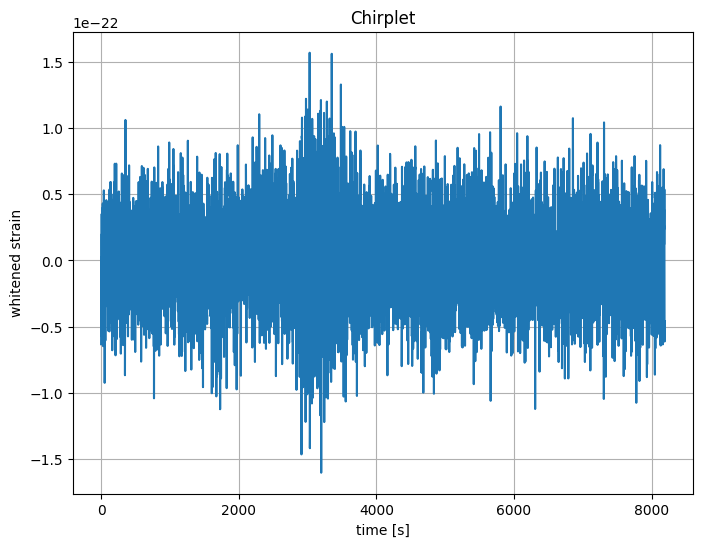

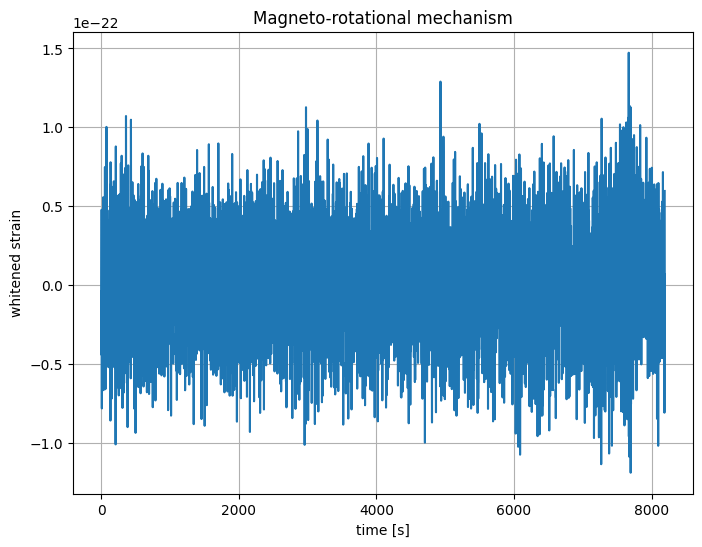

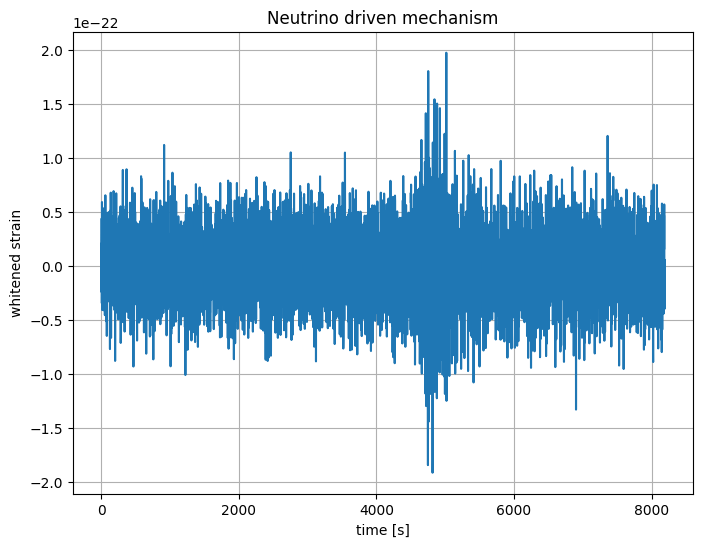

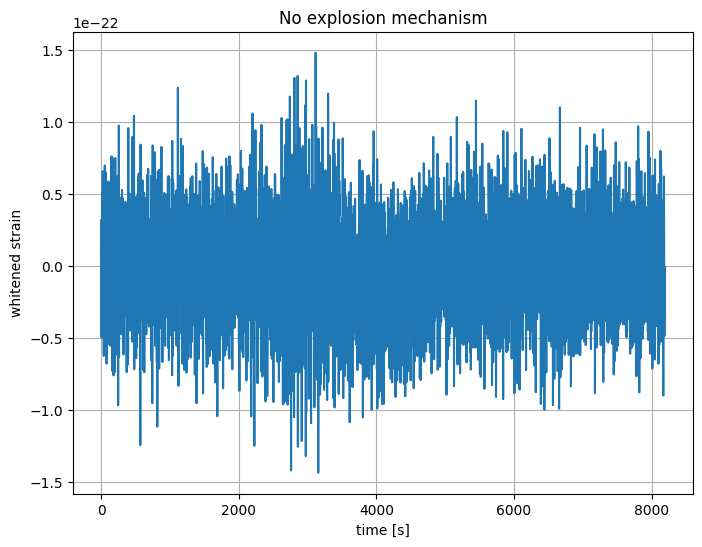

In [11]:
#%matplotlib widget
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(chirp,label='Chirplet')
plt.title('Chirplet')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(magrot,label='Magneto-rotational mechanism')
plt.title('Magneto-rotational mechanism')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(neutrino,label='Neutrino driven mechanism')
plt.title('Neutrino driven mechanism')
plt.figure()
plt.grid(), plt.xlabel('time [s]'), plt.ylabel('whitened strain')
plt.plot(noexp,label='No explosion mechanism')
plt.title('No explosion mechanism')

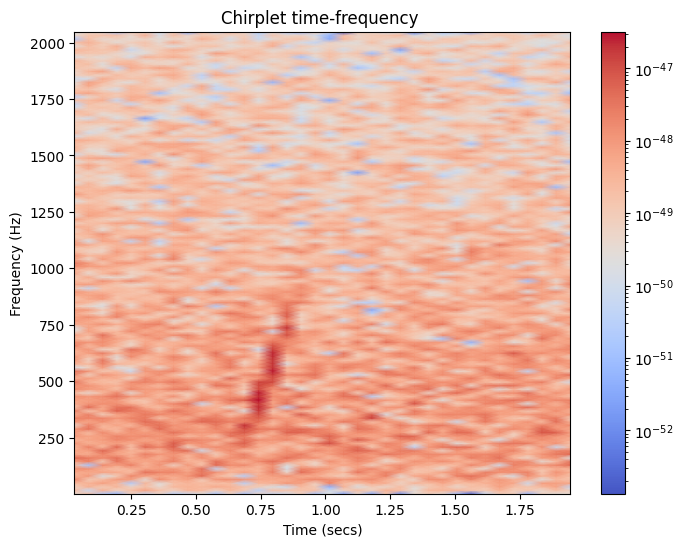

In [12]:
fs=4096
dt=1/fs
x=np.arange(0,2, dt, dtype=None)
prepareImage_ml(chirp,fs,"Chirplet time-frequency ")

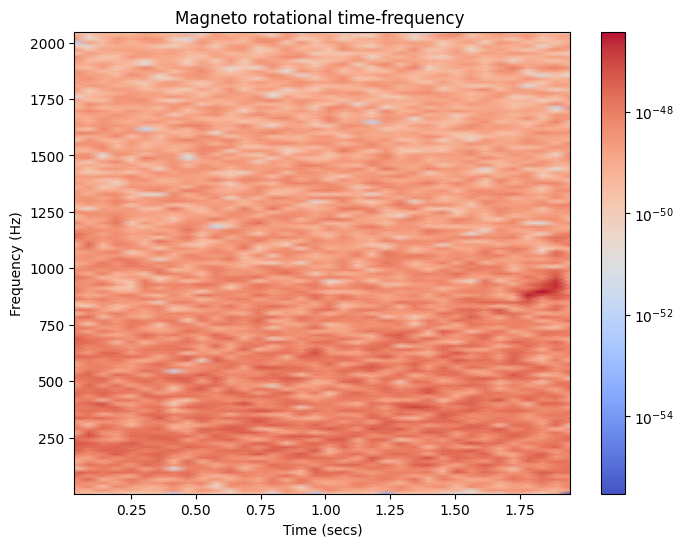

In [10]:
prepareImage_ml(magrot,fs,"Magneto rotational time-frequency ")

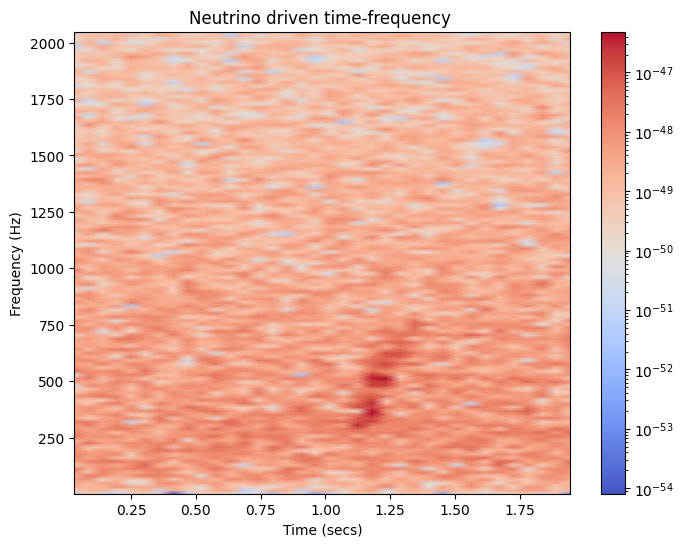

In [11]:
prepareImage_ml(neutrino,fs,"Neutrino driven time-frequency ")

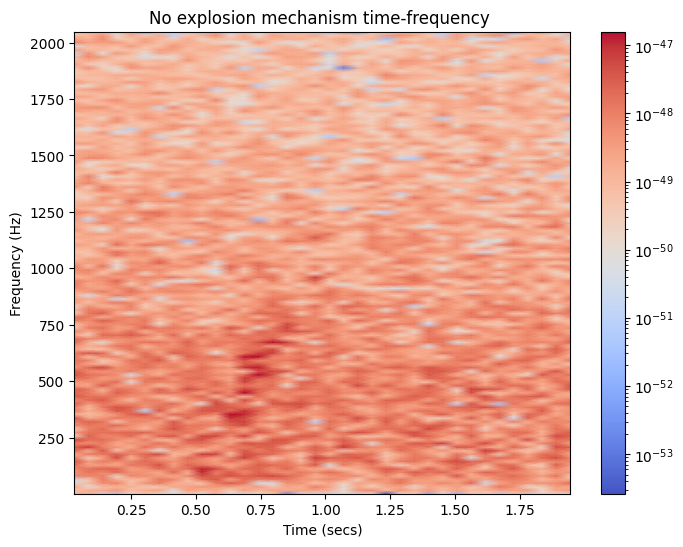

In [12]:
prepareImage_ml(noexp,fs,"No explosion mechanism time-frequency ")

### Load data and create data frame for analysis

Now we want to use the 2D-CNN pipeline, so we need to transform the time series in images, as the plot we showed above

In [13]:
os.listdir('../../data')

['datasets.tgz', 'chirp', 'neutrino', 'noexp', 'magrot']

## Create and save an image dataset 

**We have prepared the dat sets you can download here**

In [50]:

url_orig = "https://owncloud.ego-gw.it/index.php/s/IFls97hbY0lyVnh/download"
target_path = '../../data/'

if not os.path.exists(target_path):
    os.mkdir(target_path)

target_file= '../../data/images.tgz'
download(url_orig, target_file)

https://owncloud.ego-gw.it/index.php/s/IFls97hbY0lyVnh/download: 100%|█| 2.25G/2.25G [00:28<00:00, 85.0M



**You can extract the dataset**

In [51]:

tardata = tarfile.open(target_file)
tardata.extractall(target_path) # specify which folder to extract to
tardata.close()

Let's open the images and have a look at them

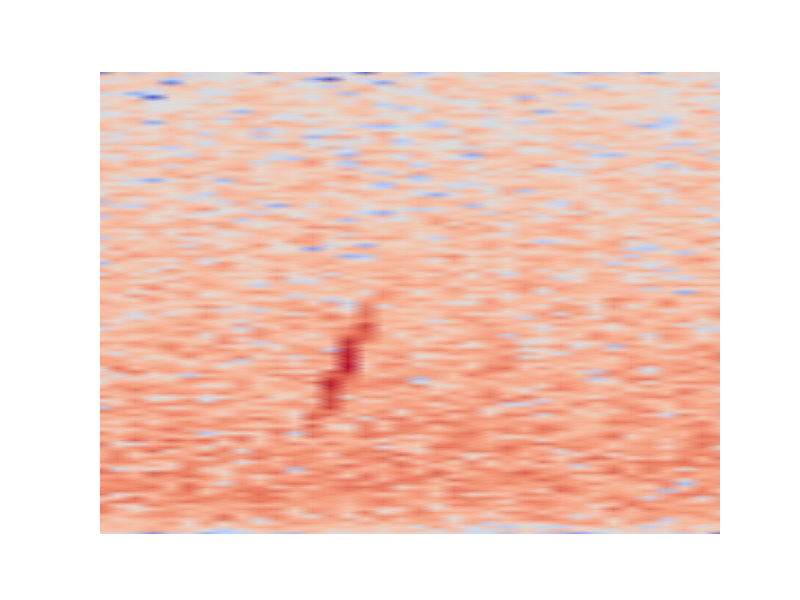

In [56]:
display.Image("../../data/images/chirp/chirp_snr40_7.png")

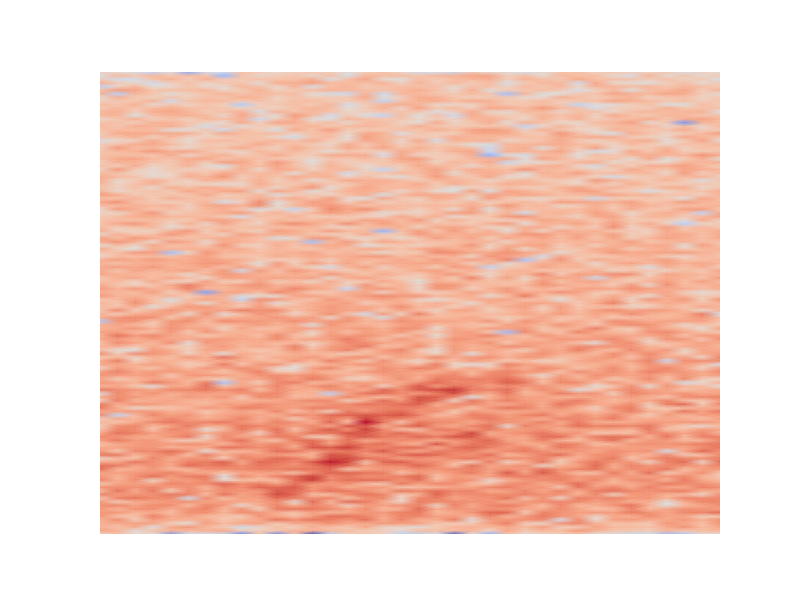

In [57]:
display.Image("../../data/images/magrot/magrot_snr40_7.png")

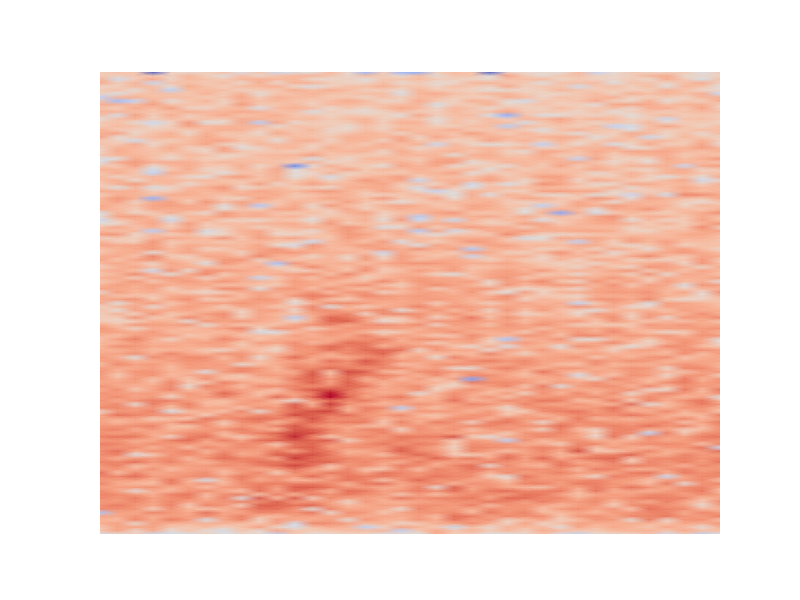

In [59]:
display.Image("../../data/images/neutrino/neutrino_snr40_7.png")

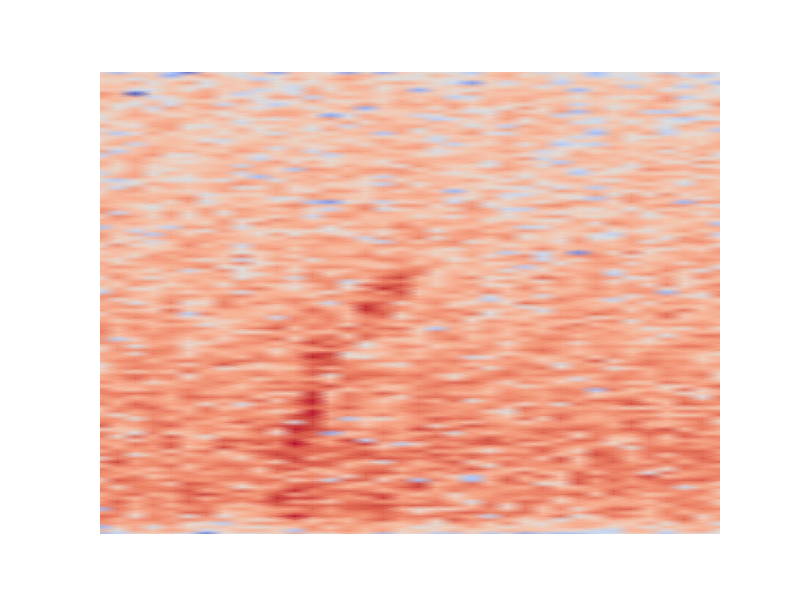

In [60]:
display.Image("../../data/images/noexp/noexp_snr40_7.png")

In [61]:
from PIL import Image

im = Image.open("../../data/images/noexp/noexp_snr40_7.png")

print(im.size)
print(type(im.size))

(800, 600)
<class 'tuple'>


### We need to prepare our datsets for CCN-2D pipeline. 
- Load the images and resize
- Add the labels
- Reshape as input for the CNN-2D

In [70]:
def LoadandResizeImage_ml(filename):
    im = Image.open(filename)
    imr=im.resize((80,60))
    numpydata = np.asarray(imr)
     
    return numpydata

In [73]:
target_path="../../data/images/"
embed_path = target_path+'chirp/'      

arr_img = []
Y_label=[]
for file in os.listdir(embed_path):
    temp = LoadandResizeImage_ml(embed_path+file) 
    arr_img.append(temp)
    Y_label.append(0)
target_path="../../data/images/"
embed_path = target_path+'magrot/'
for file in os.listdir(embed_path):
    temp = LoadandResizeImage_ml(embed_path+file) 
    arr_img.append(temp)
    Y_label.append(1)
target_path="../../data/images/"
embed_path = target_path+'neutrino/'
for file in os.listdir(embed_path):
    temp = LoadandResizeImage_ml(embed_path+file) 
    arr_img.append(temp)
    Y_label.append(2)  
target_path="../../data/images/"
embed_path = target_path+'noexp/'
for file in os.listdir(embed_path):
    temp = LoadandResizeImage_ml(embed_path+file) 
    arr_img.append(temp)
    Y_label.append(3)       
    

print (len(arr_img),len(Y_label))


6860 6860


In [74]:
X=np.array(arr_img)
Y=np.array(Y_label)

In [ ]:
try:
    import sklearn  
except:
    ! pip install -q "scikit-learn"

#### Let's prepare test, training and validation data sets

In [117]:
from sklearn.model_selection import train_test_split
 
x_train, x_test,y_train,y_test = train_test_split(X,Y, random_state=52,test_size=0.2)
 

## Alternative way to do the same, using keras

https://www.tensorflow.org/tutorials/load_data/images?hl=it

In [76]:
import pathlib
dataset_url = "https://owncloud.ego-gw.it/index.php/s/IFls97hbY0lyVnh/download"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='images',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

2414432339/2414432339 [==============================] - 25s 0us/step


In [77]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

6860


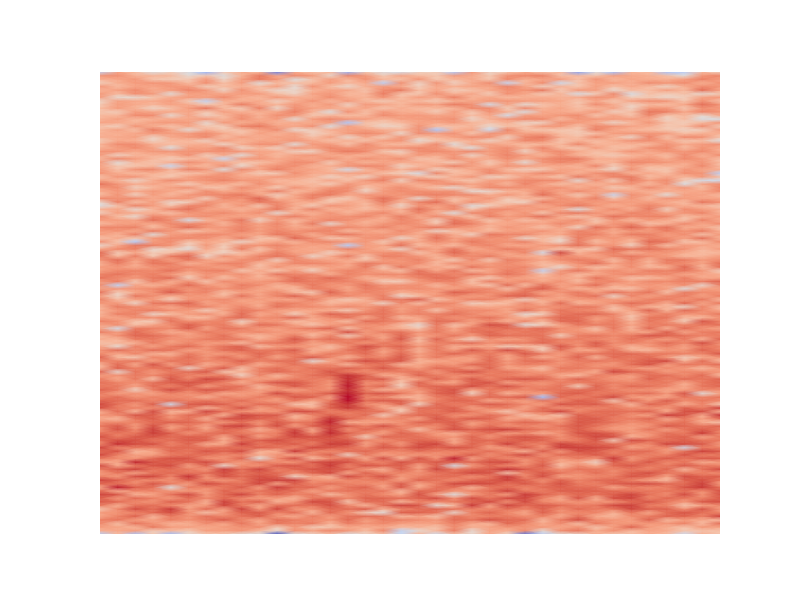

In [80]:
import PIL
chirps = list(data_dir.glob('chirp/*'))
PIL.Image.open(str(chirps[0]))

In [96]:
batch_size = 32
img_height = 60
img_width = 80

In [97]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6860 files belonging to 4 classes.
Using 5488 files for training.


In [98]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6860 files belonging to 4 classes.
Using 1372 files for validation.


In [99]:
class_names = train_ds.class_names
print(class_names)

['chirp', 'magrot', 'neutrino', 'noexp']


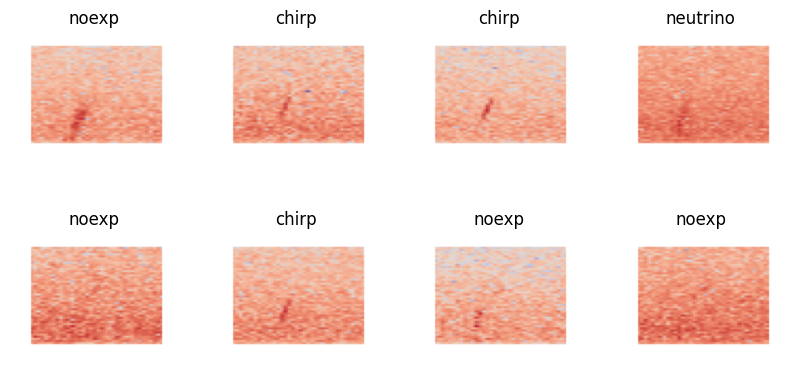

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(4,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [101]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 60, 80, 3)
(32,)


In [102]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [103]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.12941177 1.0


In [104]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [114]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
 
 

In [106]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [107]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


2023-09-11 18:57:05.045314: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-11 18:57:05.114480: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-11 18:57:05.219276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-11 18:57:05.336474: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f6495bf450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-11 18:57:05.336499: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-09-11 18:57:05.403154: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-11 18:57:05.556493: I te

172/172 [==============================] - 5s 18ms/step - loss: 1.3829 - accuracy: 0.2832 - val_loss: 1.3750 - val_accuracy: 0.2894
Epoch 2/10
172/172 [==============================] - 1s 4ms/step - loss: 0.9981 - accuracy: 0.5335 - val_loss: 0.4760 - val_accuracy: 0.7478
Epoch 3/10
172/172 [==============================] - 1s 5ms/step - loss: 0.2785 - accuracy: 0.8878 - val_loss: 0.1921 - val_accuracy: 0.9278
Epoch 4/10
172/172 [==============================] - 1s 4ms/step - loss: 0.1460 - accuracy: 0.9490 - val_loss: 0.1263 - val_accuracy: 0.9541
Epoch 5/10
172/172 [==============================] - 1s 4ms/step - loss: 0.0990 - accuracy: 0.9648 - val_loss: 0.0980 - val_accuracy: 0.9672
Epoch 6/10
172/172 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9758 - val_loss: 0.0943 - val_accuracy: 0.9665
Epoch 7/10
172/172 [==============================] - 1s 4ms/step - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.0951 - val_accuracy: 0.9672
Epoch 8/10
172/1

## We will try to classify the signals using 2D-CNN model

In [108]:
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
#from tensorflow.keras.layers.advanced_activations import *
from tensorflow.keras.callbacks import Callback,EarlyStopping,ModelCheckpoint

 

In [109]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [111]:
classes = 4

In [115]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
 

In [119]:
epochs = 10
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=0),
]
model.compile(
     optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
138/138 [==============================] - 2s 5ms/step - loss: 1.4006 - accuracy: 0.2740 - val_loss: 1.3727 - val_accuracy: 0.2878 - lr: 0.0010
Epoch 2/10
138/138 [==============================] - 1s 4ms/step - loss: 1.3732 - accuracy: 0.2938 - val_loss: 1.2809 - val_accuracy: 0.4536 - lr: 0.0010
Epoch 3/10
138/138 [==============================] - 1s 5ms/step - loss: 0.7693 - accuracy: 0.6720 - val_loss: 0.4080 - val_accuracy: 0.8288 - lr: 0.0010
Epoch 4/10
138/138 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.8679 - val_loss: 0.2115 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 5/10
138/138 [==============================] - 1s 5ms/step - loss: 0.1924 - accuracy: 0.9255 - val_loss: 0.1664 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 6/10
138/138 [==============================] - 1s 4ms/step - loss: 0.1412 - accuracy: 0.9437 - val_loss: 0.1118 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 7/10
138/138 [==============================] - 1s 5ms/step - lo

### Plot the training and validation accuracy

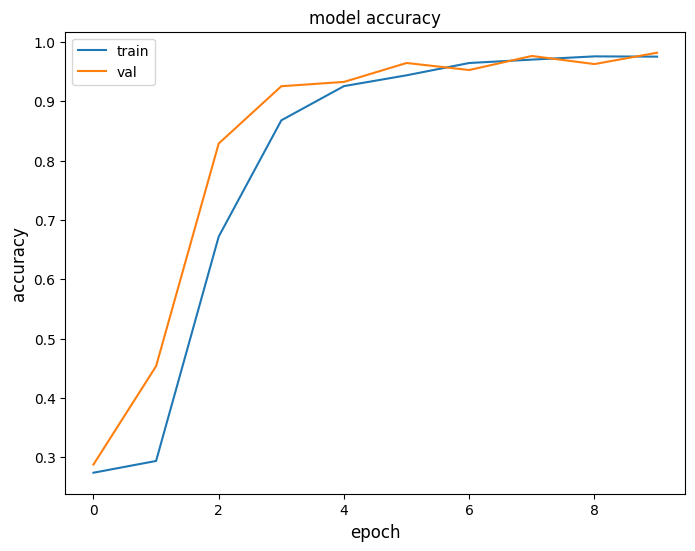

In [120]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

### Predict the results on test data sets

In [121]:
y_predicted = model.predict(x_test)
y_pred = np.argmax(y_predicted, axis=1)
print(y_pred)
labels = ["chirp", "magrot", "neutrino", "noexp"]

43/43 [==============================] - 0s 1ms/step
[3 2 1 ... 2 0 1]


### Build the confusion Matrix to show the results

The confusion matrix is a fundamental tool in evaluating the performance of a multi-class machine learning model. It provides a summary of the predictions made by the model and their correspondence to the actual classes in the dataset. In a multi-class scenario, the confusion matrix is a square matrix where each row represents the instances in a predicted class and each column represents the instances in an actual class. Here's an example of a confusion matrix for a multi-class model:

|    Predicted Class   |   Class A   |   Class B   |   Class C   |
|----------------------|-------------|-------------|-------------|
|      **Class A**     |     TP      |     FN      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class B**     |     FP      |     TP      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class C**     |     FN      |     FP      |     TP      |
|----------------------|-------------|-------------|-------------|
 

In the confusion matrix, the terms have the following meanings:
- **True Positives (TP)**: The number of instances correctly predicted as belonging to a particular class.
- **False Positives (FP)**: The number of instances incorrectly predicted as belonging to a particular class when they actually belong to a different class.
- **False Negatives (FN)**: The number of instances incorrectly predicted as not belonging to a particular class when they actually belong to that class.
To interpret the confusion matrix, you can analyze the distribution of predictions across the classes. Key metrics derived from the confusion matrix include:

* Accuracy: It measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN).
* Precision: It quantifies the model's ability to correctly identify positive instances for a given class and is calculated as TP / (TP + FP).
* Recall (also known as Sensitivity or True Positive Rate): It represents the model's ability to correctly identify positive instances out of the total actual positive instances and is calculated as TP / (TP + FN).
* F1-score: It combines precision and recall into a single metric and is calculated as the harmonic mean of precision and recall, given by 2 * (Precision * Recall) / (Precision + Recall).
By analyzing the values in the confusion matrix and these metrics, you can gain insights into the strengths and weaknesses of your multi-class machine learning model and make informed decisions about improving its performance.

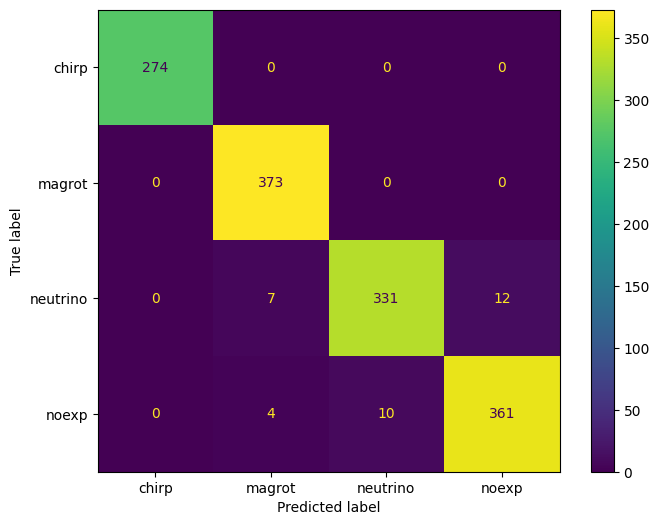

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

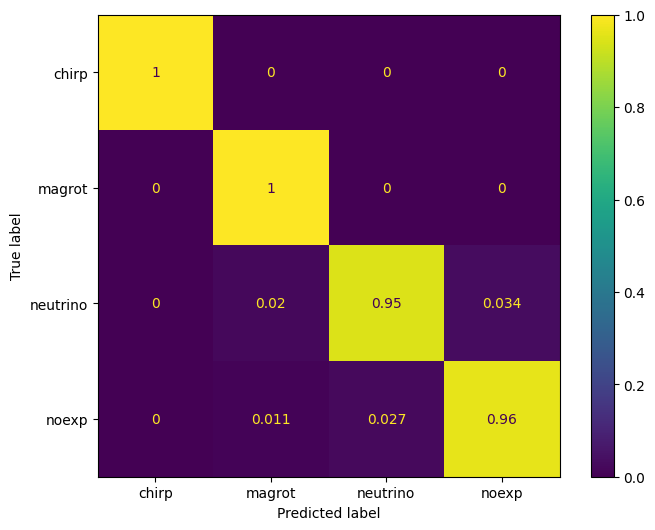

In [123]:

cm=confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()